In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
fifa22 = pd.read_csv('data/FIFA22_official_data.csv')
cr7 = fifa22[fifa22['Name'] == 'Cristiano Ronaldo'].iloc[:1, 27:61]
cr7

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
36,87.0,95.0,90.0,80.0,86.0,88.0,81.0,84.0,77.0,88.0,...,88.0,95.0,NaN,32.0,24.0,7.0,11.0,15.0,14.0,11.0


In [61]:
cr7.insert(0, 'Name', 'Cristiano Ronaldo')

In [62]:
messi = fifa22[fifa22['Name'] == 'L. Messi'].iloc[:1, 27:61]
messi

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
29,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,...,75.0,96.0,NaN,35.0,24.0,6.0,11.0,15.0,14.0,8.0


In [63]:
messi.insert(0, 'Name', 'Lionel Messi')

In [64]:
players = pd.concat([cr7, messi])
players

,Name,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
36,Cristiano Ronaldo,87.0,95.0,90.0,80.0,86.0,88.0,81.0,84.0,77.0,...,88.0,95.0,NaN,32.0,24.0,7.0,11.0,15.0,14.0,11.0
29,Lionel Messi,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,...,75.0,96.0,NaN,35.0,24.0,6.0,11.0,15.0,14.0,8.0


In [83]:
def radar_plot(data: pd.DataFrame, color: list) -> None:
    """
    Function that creates radar plot of given data
    Parameters
    ----------
    data: dataframe
        Dataframe with data (first column is skipped because it is considered as a player name)
    color: list
        List of colors - should be different for every data row
    Returns
    -------
    Creates plot using given dataframe
    """
    angles = np.linspace(0, 2 * np.pi, len(data.columns) - 1, endpoint=False).tolist()
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    counter = 0
    for _, row in data.iterrows():
        ax.fill(angles, row[1:].values, color=color[counter], alpha=0.33, label=row[0])
        counter += 1

    ax.set_ylim(0, 100)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles), list(data.columns[1:]))
    ax.legend()

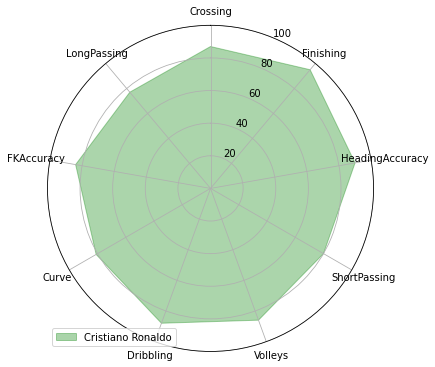

In [84]:
radar_plot(cr7.iloc[:, 0:10], ['green'])

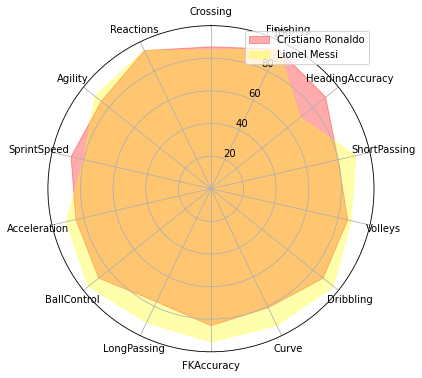

In [85]:
radar_plot(players.iloc[:, 0:15], ['red', 'yellow'])